<a href="https://colab.research.google.com/github/SIDDXSingh/MNIST/blob/main/Mnist_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install idx2numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import idx2numpy as idx
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd


a=pd.read_csv()
trainX = idx.convert_from_file('/content/drive/MyDrive/ML/train-images.idx3-ubyte')
trainY= idx.convert_from_file('/content/drive/MyDrive/ML/train-labels.idx1-ubyte')
trainY=trainY.reshape((1,trainY.shape[0]))

testY= idx.convert_from_file('/content/drive/MyDrive/ML/t10k-labels.idx1-ubyte')
testX=idx.convert_from_file('/content/drive/MyDrive/ML/t10k-images.idx3-ubyte')
testY=testY.reshape((1,testY.shape[0]))



n_testX = testX.shape[0]
n_trainX= trainX.shape[0]
n_testY=  testY.shape[0]
n_trainY= trainY.shape

Y=np.zeros((10,trainY.shape[1]))
Y[trainY[0,:],np.arange(trainY.shape[1])]=1

Y_test = np.zeros((10,testY.shape[1]))
Y_test[testY[0,:],np.arange(testY.shape[1])]=1


print(Y.shape[1])

TypeError: ignored

In [ ]:
trainflat= np.reshape(trainX,(trainX.shape[0],-1)).T/255
testflat = np.reshape(testX,(testX.shape[0],-1)).T/255

print(testflat.shape)



(784, 10000)


In [ ]:
def sigmoid(z):
  a=1/(1+np.exp(-z))
  return a

In [ ]:
def Relu(z,derivative):
  
  if (derivative==True):
    dz = np.array(z, copy=True)
    dz[z<=0] = 0
    dz[z>0] = 1
    return dz


  return np.maximum(0,z)


In [ ]:
def initialize(n_y, n_x, n_h1,n_h2):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    """
    W1=np.random.randn(n_h1, n_x)*np.sqrt(2/784)
    b1=np.zeros((n_h1,1))
    W2=np.random.randn(n_h2,n_h1) *np.sqrt(2/256)
    b2 = np.zeros((n_h2, 1))
    W3=np.random.randn(n_y,n_h2) *np.sqrt(2/64)
    b3 = np.zeros((n_y, 1))
    params={
            "W1":W1,
           "b1":b1,
           "W2":W2,
           "b2":b2,
            "W3":W3,
            "b3":b3
            }
    return params


In [ ]:
def initialize2(n_y, n_x, n_h1,n_h2,n_h3):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    """
    W1=np.random.randn(n_h1, n_x)*np.sqrt(2/784)
    b1=np.zeros((n_h1,1))
    W2=np.random.randn(n_h2,n_h1) * np.sqrt(2/512)
    b2 = np.zeros((n_h2, 1))
    W3=np.random.randn(n_h3,n_h2) * np.sqrt(2/128)
    b3 = np.zeros((n_h3, 1))
    W4=np.random.randn(n_y, n_h3)*np.sqrt(2/32)
    b4=np.zeros((n_y,1))
    params={
            "W1":W1,
           "b1":b1,
           "W2":W2,
           "b2":b2,
            "W3":W3,
            "b3":b3,
            "W4":W4,
            "b4":b4
            }
    return params

In [ ]:
def softmax(z):
  t=np.exp((z-z.max()))
  sum=np.sum(t,axis=0,keepdims=True)
  a=t/sum

  return a
  

In [ ]:
print(softmax(np.array([3,4,1,2])))

[0.23688282 0.64391426 0.0320586  0.08714432]


In [ ]:
def fwd(X,params):
  
  W1=params["W1"]
  b1=params["b1"]
  W2=params["W2"]
  b2=params["b2"]
  W3=params["W3"]
  b3=params["b3"]
  
  z1 = np.dot(W1,X)+b1
  a1=Relu(z1,derivative=False)
  z2= np.dot(W2,a1)+b2
  a2=sigmoid(z2)
  z3=np.dot(W3,a2)+b3
  a3=softmax(z3)


  cache={
          "z1":z1,
          "z2":z2,
          "a1":a1,
          "a2":a2,
         "z3":z3,
         "a3":a3
          }
  return cache

In [ ]:
def fwd2(X,params):
  
  W1=params["W1"]
  b1=params["b1"]
  W2=params["W2"]
  b2=params["b2"]
  W3=params["W3"]
  b3=params["b3"]
  W4=params["W4"]
  b4=params["b4"]
  
  z1 = np.dot(W1,X)+b1
  a1=Relu(z1,derivative=False)
  z2= np.dot(W2,a1)+b2
  a2=Relu(z2,derivative=False)
  z3=np.dot(W3,a2)+b3
  a3=Relu(z3,derivative=False)
  z4=np.dot(W4,a3)+b4
  a4=softmax(z4)


  cache={
          "z1":z1,
          "z2":z2,
          "a1":a1,
          "a2":a2,
         "z3":z3,
         "a3":a3,
         "z4":z4,
         "a4":a4
          }
  return cache

In [ ]:
def cost(a4,Y, parameters):

  m=Y.shape[1]
  loss=-np.sum(np.multiply(Y,np.log(a4+0.0000001)),axis=0,keepdims=True)
  cos=(1/m)*np.sum(loss,axis=1)
  cos=np.squeeze(cos)

  return cos

In [ ]:
def backprop(params,lr,cache,X,Y):
  a1=cache["a1"]
  a2=cache["a2"]
  a3=cache["a3"]

  z1=cache["z1"]
  z2=cache["z2"]
  z3=cache["z3"]

  W1=params["W1"]
  W2=params["W2"]
  W3=params["W3"]
  b1=params["b1"]
  b2=params["b2"]
  b3=params["b3"]

  m=a2.shape[1]

  dz3 = a3-Y
  dW3 = (1/m)*np.dot(dz3,a2.T)
  db3=  (1/m)*np.sum(dz3,axis=1,keepdims=True)
  
  m=a1.shape[1]
  dz2 = np.dot(W3.T,dz3)*(a2*(1-a2))
  dW2 = (1/m)*np.dot(dz2,a1.T)
  db2=  (1/m)*np.sum(dz2,axis=1,keepdims=True)

  m=X.shape[1]

  dz1 = np.dot(W2.T,dz2)*Relu(z1,derivative=True)
  
  dW1 = (1/m)*np.dot(dz1,X.T)
  db1=  (1/m)*np.sum(dz1,axis=1,keepdims=True)

  W1=W1-(lr*dW1)
  b1=b1-lr*db1

  W3=W3-(lr*dW3)
  b3=b3-lr*db3

  W2=W2-(lr*dW2)
  b2=b2-lr*db2
  params={
            "W1":W1,
           "b1":b1,
           "W2":W2,
           "b2":b2,
            "W3":W3,
            "b3":b3
            }
  return params


In [ ]:

def backprop2(params,lr,cache,X,Y):
  a1=cache["a1"]
  a2=cache["a2"]
  a3=cache["a3"]
  a4=cache["a4"]


  z1=cache["z1"]
  z2=cache["z2"]
  z3=cache["z3"]
  z4=cache["z4"]

  W1=params["W1"]
  W2=params["W2"]
  W3=params["W3"]
  W4=params["W4"]
  b1=params["b1"]
  b2=params["b2"]
  b3=params["b3"]
  b4=params["b4"]

  m=a2.shape[1]

  dz4 = a4-Y
  dW4 = (1/m)*np.dot(dz4,a3.T)
  db4=  (1/m)*np.sum(dz4,axis=1,keepdims=True)


  dz3 = np.dot(W4.T,dz4)*Relu(z3,derivative=True)
  dW3 = (1/m)*np.dot(dz3,a2.T)
  db3=  (1/m)*np.sum(dz3,axis=1,keepdims=True)
  

  dz2 = np.dot(W3.T,dz3)*Relu(z2,derivative=True)
  dW2 = (1/m)*np.dot(dz2,a1.T)
  db2=  (1/m)*np.sum(dz2,axis=1,keepdims=True)



  dz1 = np.dot(W2.T,dz2)*Relu(z1,derivative=True)
  
  dW1 = (1/m)*np.dot(dz1,X.T)
  db1=  (1/m)*np.sum(dz1,axis=1,keepdims=True)

  W1=W1-(lr*dW1)
  b1=b1-lr*db1

  W3=W3-(lr*dW3)
  b3=b3-lr*db3

  W2=W2-(lr*dW2)
  b2=b2-lr*db2

  W4=W4-(lr*dW4)
  b4=b4-(lr*db4)

  params={
            "W1":W1,
           "b1":b1,
           "W2":W2,
           "b2":b2,
            "W3":W3,
            "b3":b3,
          "W4":W4,
          "b4":b4
            }
  return params


In [ ]:
def model(X,Y,itr,lr):


  n_x=X.shape[0]
  n_y=10
  n_h1=256
  n_h2=64
  n_h3=32
  costlist=[]
  params=initialize(n_y,n_x,n_h1,n_h2)

  iteration=[]
  for i in range(itr):
    cache=fwd(X,params)
    cos=cost(cache["a3"],Y,params)
    params=backprop(params,lr,cache,X,Y)


    costlist.append(cos) 

    iteration.append(i)
    if(i%50==0):
      print ("cost after ",i,"th iteration is", cos)
    '''plt.plot(iteration,costlist)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.show()
    plt.close()'''

  
  plot={"c":costlist,
        "i":iteration}
  return params,plot

In [ ]:
def model2(X,Y,itr):


  n_x=X.shape[0]
  n_y=10
  n_h1=128
  n_h2=64
  costlist=[]
  params=initialize2(n_y,n_x,n_h1,n_h2)

  iteration=[]
  for i in range(itr):
    cache=fwd2(X,params)
    cos=cost(cache["a2"],Y,params)
    params=backprop2(params,0.001,cache,X,Y)


    costlist.append(cos)

    iteration.append(i)

    plt.plot(iteration,costlist)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.show()
    plt.close()

  plot={"c":costlist,
        "i":iteration}
  return params,plot

In [ ]:
def predict(X,params):
    
  W1=params["W1"]
  b1=params["b1"]
  W2=params["W2"]
  b2=params["b2"]
  W3=params["W3"]
  b3=params["b3"]


  z1 = np.dot(W1,X)+b1
  a1=Relu(z1,False)
  z2= np.dot(W2,a1)+b2
  a2=sigmoid(z2)
  z3=np.dot(W3,a2)+b3
  a3=softmax(z3)

  '''
  z4=np.dot(W4,a3)+b4
  a4=softmax(z4)
  '''

  prediction=a3
  return prediction

In [ ]:

def accuracy(Y,predictions):
  pval=np.argmax(predictions,axis=0)
  yval=np.argmax(Y,axis=0)
  wrong_labels=np.count_nonzero((yval-pval))
  correct_labels=yval.shape[0]-wrong_labels

  accuracy=((correct_labels)/yval.shape[0])*100

  cacheN={"correct_labels":correct_labels,
     "wrong_labels":wrong_labels,
     "accuracy":accuracy}

  return cacheN
  

cost after  0 th iteration is 2.574120530244661
cost after  50 th iteration is 1.6528831433244893
cost after  100 th iteration is 1.1311811007787744
cost after  150 th iteration is 0.8587850585649751
cost after  200 th iteration is 0.7044460213763724
cost after  250 th iteration is 0.6063628611984868
cost after  300 th iteration is 0.5389714020695806
cost after  350 th iteration is 0.49024001631082276
cost after  400 th iteration is 0.453635581044366
cost after  450 th iteration is 0.4252507125990783
cost after  500 th iteration is 0.40260762379745385
cost after  550 th iteration is 0.38407636475985657
cost after  600 th iteration is 0.36856373528307607
cost after  650 th iteration is 0.35530957901957155


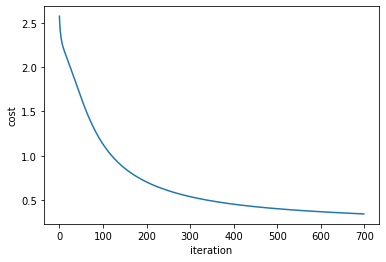

train data:  {'correct_labels': 54504, 'wrong_labels': 5496, 'accuracy': 90.84}
test data:  {'correct_labels': 9125, 'wrong_labels': 875, 'accuracy': 91.25}


In [ ]:
params,plot=model(trainflat,Y,700,0.09)
predictions_train=predict(trainflat,params)
predictions_test=predict(testflat,params)


plt.plot(plot["i"],plot["c"])
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()
print("train data: ",accuracy(Y,predictions_train))


print("test data: ",accuracy(Y_test,predictions_test))


